# Feature Selection

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# Load the dataset
df = pd.read_csv("../Datasets/Companies/SmallCompanies.csv")

df.head()

,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
0,AK_2013_VCP_1,3/1/2013,180000.0,0.0,Metro,Non-LMI,0.0,5.0,541511,3.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
1,AK_2013_VCP_3,12/30/2013,265000.0,0.0,Metro,Non-LMI,0.0,7.0,541511,2.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
2,AK_2014_VCP_1,4/11/2014,199500.0,0.0,Metro,Non-LMI,0.0,2.0,336612,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
3,AK_2014_VCP_2,5/15/2014,125000.0,0.0,Metro,LMI,1494916.0,8.0,451110,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
4,AK_2014_VCP_3,9/15/2014,120000.0,0.0,Metro,Non-LMI,41000.0,0.0,336612,0.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0


In [27]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (18584, 16)


In [28]:
# Get concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   loan_investment_amount         18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   full_time_employees            18584 non-null  float64
 8   naics_code                     18584 non-null  int64  
 9   jobs_created                   18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [29]:
# Filter out the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values for each categorical column
unique_counts_categorical = df[categorical_columns].nunique()

unique_counts_categorical

unique_id                        18563
disbursement_date                 1572
metro_type                           2
LMI_type                             2
lender_type_category                 6
optional_primary_use_of_funds        5
optional_stage                       5
active_status                       10
dtype: int64

In [30]:
df=df[df['active_status']!='Unknown']

In [31]:
different_active_statuses = df['active_status'].unique()

print(different_active_statuses)

['Did not attempt to confirm operations' 'Yes'
 'Attempted to confirm operations, but unable' 'Other' 'Sold' 'Exit'
 'Loss' 'Bankrupt' 'Moved']


## Encoding

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4050 entries, 778 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      4050 non-null   object 
 1   disbursement_date              4050 non-null   object 
 2   loan_investment_amount         4050 non-null   float64
 3   lender_insurance_premium       4050 non-null   float64
 4   metro_type                     4050 non-null   object 
 5   LMI_type                       4050 non-null   object 
 6   revenue                        4050 non-null   float64
 7   full_time_employees            4050 non-null   float64
 8   naics_code                     4050 non-null   int64  
 9   jobs_created                   4050 non-null   float64
 10  lender_type_category           4050 non-null   object 
 11  optional_primary_use_of_funds  4050 non-null   object 
 12  optional_revenue_yr_confirmed  4050 non-null   flo

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Assuming 'df' is your DataFrame

# Initialize LabelEncoder for 'active_status' column
label_encoder = LabelEncoder()

# Encode 'active_status' column
df['active_status'] = label_encoder.fit_transform(df['active_status'])

# Get the list of categorical columns excluding 'active_status'
categorical_columns = [col for col in df.select_dtypes(include=['object']) if col != 'active_status']

# Apply one-hot encoding to remaining categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

# Print the encoded DataFrame
print(df.head())


,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
778,0,0,100000.0,0.0,0,0,2027806.00,12.0,541330,0.0,0,0,2014.0,0,0,80000.0
800,0,0,240000.0,0.0,0,0,1662422.00,2.0,238220,0.0,0,0,2014.0,0,0,180000.0
802,0,0,282000.0,0.0,0,0,268058.00,11.0,722511,1.0,0,0,2014.0,0,0,225600.0
832,0,0,50000.0,0.0,0,0,254153.58,4.0,487210,0.0,0,0,2014.0,0,0,25000.0
847,0,0,21500.0,0.0,0,0,0.00,1.0,453310,0.0,0,0,2014.0,0,0,17200.0


In [34]:
different_active_statuses = df['active_status'].unique()

print(different_active_statuses)

[0 1]


## Standardization

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled_df.head()

,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
0,-1.204813,-1.204813,-0.315060,-0.198289,-1.204813,-1.204813,0.035271,2.041887,0.174757,-0.396519,-1.204813,-1.204813,-0.43048,-1.204813,-1.204813,0.134016
1,-1.204813,-1.204813,-0.208173,-0.198289,-1.204813,-1.204813,0.020824,-0.558458,-1.671985,-0.396519,-1.204813,-1.204813,-0.43048,-1.204813,-1.204813,0.664893
2,-1.204813,-1.204813,-0.176107,-0.198289,-1.204813,-1.204813,-0.034310,1.781853,1.278630,-0.313751,-1.204813,-1.204813,-0.43048,-1.204813,-1.204813,0.906973
3,-1.204813,-1.204813,-0.353234,-0.198289,-1.204813,-1.204813,-0.034859,-0.038389,-0.154977,-0.396519,-1.204813,-1.204813,-0.43048,-1.204813,-1.204813,-0.157967
4,-1.204813,-1.204813,-0.374993,-0.198289,-1.204813,-1.204813,-0.044909,-0.818492,-0.361517,-0.396519,-1.204813,-1.204813,-0.43048,-1.204813,-1.204813,-0.199375


## PCA

In [36]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
pca = PCA(n_components=16)

# Fit PCA to the scaled data
pca.fit(scaled_df)

# Transform the data to the new feature space
transformed_data = pca.transform(scaled_df)

# Convert the transformed data to a DataFrame
selected_features = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, 17)])


selected_features



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,3.538841,0.192886,-0.409686,1.063405,1.107865,-0.998699,-0.005840,-0.456406,0.142759,-1.934911e-14,3.256909e-16,8.938415e-16,-1.459180e-16,-8.105249e-16,-1.361980e-16,-2.314796e-16
1,3.463765,-0.125539,-0.485557,0.749377,-0.863292,1.284227,0.244860,0.539654,-0.176801,-1.797671e-14,-3.637595e-16,8.485738e-16,-4.897395e-16,-8.177226e-16,-1.342343e-16,-2.324385e-16
2,3.551795,0.753546,-0.161280,0.235049,1.556698,-1.340174,-0.168991,0.255983,0.150161,-1.929067e-14,-1.112687e-17,9.087560e-16,-2.725990e-16,-8.210048e-16,-1.333389e-16,-2.328758e-16
3,3.439876,-0.407089,-0.231866,-0.080611,0.023415,0.195829,0.183721,-0.141496,-0.139577,-1.826096e-14,-4.081100e-16,8.326965e-16,-4.730699e-16,-8.065662e-16,-1.372780e-16,-2.309522e-16
4,3.407514,-0.608541,-0.175963,-0.440020,-0.409038,0.696964,0.255465,0.026779,-0.228814,-1.782000e-14,-6.795172e-16,8.318975e-16,-5.832534e-16,-8.060047e-16,-1.374311e-16,-2.308774e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4045,-2.511913,1.794525,0.402338,-0.577192,-0.207880,-0.034115,0.912521,2.294032,-1.093190,1.336053e-14,-4.783307e-16,-5.830897e-16,5.630802e-17,6.228161e-16,5.521629e-17,1.823454e-16
4046,-2.422171,0.108463,-0.317400,0.823839,-0.048615,-0.491007,0.838617,0.729099,0.162597,1.256326e-14,1.678216e-16,-5.055385e-16,4.245162e-16,6.463350e-16,4.879992e-17,7.445645e-17
4047,-2.438803,0.871842,0.138036,-0.257020,0.728574,-1.236633,0.702308,1.113548,-0.018765,1.260339e-14,-2.202841e-17,-4.952951e-16,4.137616e-16,6.391373e-16,5.076358e-17,7.349753e-17
4048,-2.529764,-0.233029,0.370993,-1.491641,-0.007350,-0.441651,0.828482,0.598681,0.454001,1.318474e-14,-5.771498e-16,-5.169344e-16,2.144361e-16,6.543425e-16,4.661535e-17,7.552325e-17


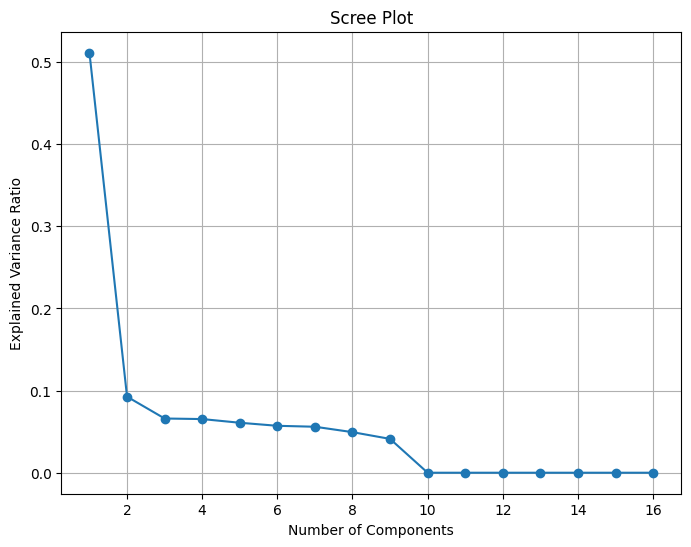

In [37]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

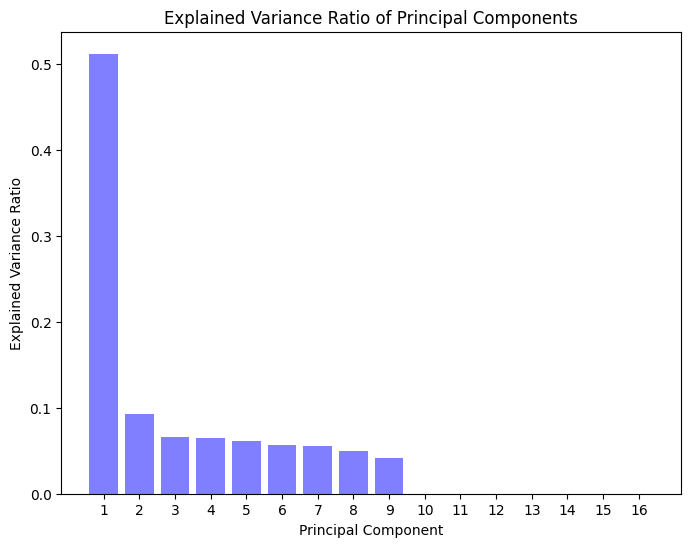

In [38]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


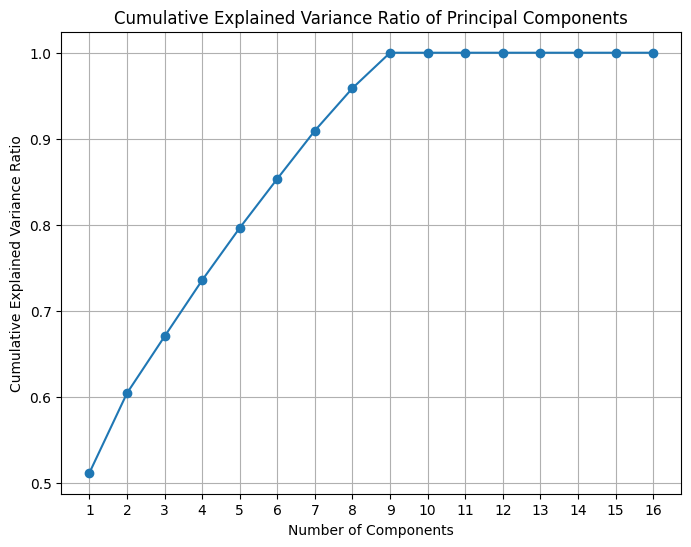

In [39]:

# Assuming pca is your PCA object
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio_cumulative) + 1))
plt.grid(True)
plt.show()


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import itertools

# Split your data into features (X) and target variable (y)
X = scaled_df.drop(columns=['active_status'])  # Assuming 'active_status' is the target variable
y = scaled_df['active_status']

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
results = []

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Linear Regression
        lr_model = LinearRegression()
        lr_model.fit(X_train[list(features)], y_train)
        lr_pred = lr_model.predict(X_test[list(features)])
        lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)

        # Random Forest Regression
        rf_model = RandomForestRegressor()
        rf_model.fit(X_train[list(features)], y_train)
        rf_pred = rf_model.predict(X_test[list(features)])
        rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)

        # Store results
        results.append({
            'Features': features,
            'Linear Regression RMSE': lr_rmse,
            'Random Forest Regression RMSE': rf_rmse
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

                                              Features  \
0                                         (unique_id,)   
1                                 (disbursement_date,)   
2                            (loan_investment_amount,)   
3                          (lender_insurance_premium,)   
4                                        (metro_type,)   
..                                                 ...   
570  (lender_type_category, optional_stage, support...   
571  (optional_primary_use_of_funds, optional_reven...   
572  (optional_primary_use_of_funds, optional_reven...   
573  (optional_primary_use_of_funds, optional_stage...   
574  (optional_revenue_yr_confirmed, optional_stage...   

     Linear Regression RMSE  Random Forest Regression RMSE  
0              3.656878e-15                   1.320470e-14  
1              3.656878e-15                   1.330578e-14  
2              9.882766e-01                   1.014221e+00  
3              9.972933e-01                   9.832727e-01 

In [41]:
from sklearn.neural_network import MLPRegressor
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store results
results = []

# Loop through all possible combinations of features
for r in range(1, 4):  # considering combinations of 1 to 3 features
    feature_combinations = list(itertools.combinations(X.columns, r))
    for features in feature_combinations:
        # Initialize Neural Network Regressor
        nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

        # Train the Neural Network Regressor
        nn_model.fit(X_train[list(features)], y_train)

        # Predict using the trained model
        nn_pred = nn_model.predict(X_test[list(features)])

        # Calculate RMSE
        nn_rmse = mean_squared_error(y_test, nn_pred, squared=False)

        # Store results
        results.append({
            'Features': features,
            'Neural Network Regression RMSE': nn_rmse
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)
print(results_df)

                                              Features  \
0                                         (unique_id,)   
1                                 (disbursement_date,)   
2                            (loan_investment_amount,)   
3                          (lender_insurance_premium,)   
4                                        (metro_type,)   
..                                                 ...   
570  (lender_type_category, optional_stage, support...   
571  (optional_primary_use_of_funds, optional_reven...   
572  (optional_primary_use_of_funds, optional_reven...   
573  (optional_primary_use_of_funds, optional_stage...   
574  (optional_revenue_yr_confirmed, optional_stage...   

     Neural Network Regression RMSE  
0                      4.622066e-07  
1                      4.622066e-07  
2                      9.697468e-01  
3                      9.838180e-01  
4                      4.622066e-07  
..                              ...  
570                    7.263334e-03  